# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Harish Rahmatullah
- **Email:** okerahmatullah17@gmail.com
- **ID Dicoding:** MC006D5Y1357

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan penggunaan layanan antara musim semi, musim panas, musim gugur, dan musim dingin?
- Bagaimana perbandingan penyewaan sepeda antara jam sibuk (pagi hingga sore) dan jam sepi (tengah malam hingga pagi)?
- Apa perbedaan penyewaan sepeda antara hari kerja dan akhir pekan? Apakah ada hari tertentu dalam seminggu yang menunjukkan permintaan tertinggi?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda? Apakah ada cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from google.colab import files

## Data Wrangling

### Gathering Data

In [3]:
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
*   instant: Nomor urut untuk setiap entri.
*   dteday: Tanggal data.
*   season: Musim (1: Musim semi, 2: Musim panas, 3: Musim gugur, 4: Musim dingin).
*   yr: Tahun (0: 2011, 1: 2012).
*   mnth: Bulan (1-12).
*   hr: Jam (0-23).
*   holiday: Apakah hari tersebut adalah hari libur (0: tidak, 1: ya).
*   weekday: Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu).
*   workingday: Apakah hari tersebut adalah hari kerja (0: tidak, 1: ya).
*   weathersit: Kategori cuaca (0: Cerah, 1: Berkabut, 2: Salju, 3: Hujan).
*   temp: Suhu (dalam skala normal).
*   atemp: Suhu yang dirasakan (dalam skala normal).
*   hum: Kelembapan (%).
*   windspeed: Kecepatan angin.
*   casual: Penyewa tidak terdaftar.
*   registered: Penyewa terdaftar.
*   cnt: Total penyewaan (casual + registered).


### Assessing Data

Assessing hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
hour_validation_ranges = {
    'season': (1, 4),
    'yr': (0, 1),
    'mnth': (1, 12),
    'hr': (0, 23),
    'holiday': (0, 1),
    'weekday': (0, 6),
    'workingday': (0, 1),
    'weathersit': (1, 4),
}

In [11]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [12]:
invalid_data_summary = {}
for column, valid_range in hour_validation_ranges.items():
    invalid_count = check_invalid_data(hour_df[column], valid_range).sum()
    invalid_data_summary[column] = invalid_count

# Tampilkan hasil
for column, count in invalid_data_summary.items():
    if count > 0:
        print(f"Kolom '{column}' memiliki {count} data tidak valid.")
    else:
        print(f"Kolom '{column}' semua data valid.")

Kolom 'season' semua data valid.
Kolom 'yr' semua data valid.
Kolom 'mnth' semua data valid.
Kolom 'hr' semua data valid.
Kolom 'holiday' semua data valid.
Kolom 'weekday' semua data valid.
Kolom 'workingday' semua data valid.
Kolom 'weathersit' semua data valid.


Assessing day_df

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [15]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
day_validation_ranges = {
    'season': (1, 4),
    'yr': (0, 1),
    'mnth': (1, 12),
    'holiday': (0, 1),
    'weekday': (0, 6),
    'workingday': (0, 1),
    'weathersit': (1, 4),
}

In [18]:
def check_invalid_data(column, valid_range):
    return (column < valid_range[0]) | (column > valid_range[1])

In [19]:
invalid_data_summary = {}
for column, valid_range in day_validation_ranges.items():
    invalid_count = check_invalid_data(day_df[column], valid_range).sum()
    invalid_data_summary[column] = invalid_count

# Tampilkan hasil
for column, count in invalid_data_summary.items():
    if count > 0:
        print(f"Kolom '{column}' memiliki {count} data tidak valid.")
    else:
        print(f"Kolom '{column}' semua data valid.")

Kolom 'season' semua data valid.
Kolom 'yr' semua data valid.
Kolom 'mnth' semua data valid.
Kolom 'holiday' semua data valid.
Kolom 'weekday' semua data valid.
Kolom 'workingday' semua data valid.
Kolom 'weathersit' semua data valid.


**Insight:**
- Tidak ada nilai yang hilang (missing value) dalam dataset.
- Tidak ada duplikasi pada data
- dteday masih bertipe object sehingga harus diubah menjadi datetime64
- Hampir semua kolom bertipe int64 / float64 sehingga memudahkan dalam analisis statistik
- Mengecek beberapa data apakah data valid dalam range yang telah ditentukan

### Cleaning Data

Mengubah tipe data kolom dteday menjadi datetime64

In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [21]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Kolom dteday diubah menjadi format datetime64

## Exploratory Data Analysis (EDA)

### Explorasi hour_df

In [22]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
# Analisis Penggunaan Sepeda Berdasarkan Musim
hour_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})


cnt  temp                            hum                          
            sum   max   min      mean       std  max   min      mean       std
season                                                                        
1        471348  0.72  0.02  0.299147  0.118726  1.0  0.00  0.581348  0.199403
2        918589  0.94  0.16  0.544663  0.139233  1.0  0.16  0.627022  0.205364
3       1061129  1.00  0.38  0.706410  0.093903  1.0  0.16  0.633167  0.177866
4        841613  0.76  0.14  0.423138  0.122167  1.0  0.16  0.667124  0.178149

In [24]:
# Analisis Penggunaan Sepeda Berdasarkan Hari (Hari Kerja vs Akhir Pekan)
hour_df.groupby(by="weekday").cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [25]:
# Analisis Penggunaan Sepeda Berdasarkan Jam (Sibuk (7-19) /Sepi (19-7))
hour_df['rush_hour'] = hour_df['hr'].apply(lambda x: 'Sibuk' if 7 <= x <= 19 else 'Sepi')
rush_usage = hour_df.groupby(by="rush_hour").cnt.sum().reset_index()
print('\nPenggunaan Sepeda Berdasarkan Jam (Sibuk/Sepi):')
print(rush_usage)


Penggunaan Sepeda Berdasarkan Jam (Sibuk/Sepi):
  rush_hour      cnt
0      Sepi   611189
1     Sibuk  2681490


In [26]:
# Analisis Penggunaan Sepeda Berdasarkan Cuaca
hour_df.groupby(by="weathersit").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})

cnt  temp                             hum                  \
                sum   max   min      mean       std   max   min      mean   
weathersit                                                                  
1           2338173  1.00  0.02  0.511054  0.200775  1.00  0.08  0.573747   
2            795952  0.96  0.02  0.474445  0.175933  1.00  0.00  0.698807   
3            158331  0.92  0.08  0.456688  0.160509  1.00  0.00  0.827632   
4               223  0.22  0.14  0.186667  0.041633  0.93  0.86  0.883333   

                      
                 std  
weathersit            
1           0.178463  
2           0.172478  
3           0.157370  
4           0.040415

In [27]:
# Mengurutkan Penggunaan Berdasarkan Cuaca
hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2338173
1,2,795952
2,3,158331
3,4,223


In [28]:
# Distribusi Penyewaan Berdasarkan Jam (0-23)
hour_df.groupby(by="hr").cnt.sum().reset_index()

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [29]:
# Rata-rata Penyewaan Harian (Weekdays vs Weekend)
hour_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean"]
}).reset_index()

weekday     cnt            
              sum        mean
0       0  444027  177.468825
1       1  455503  183.744655
2       2  469109  191.238891
3       3  473048  191.130505
4       4  485395  196.436665
5       5  487790  196.135907
6       6  477807  190.209793

In [30]:
# Pengaruh Kombinasi Cuaca dan Musim
hour_df.groupby(['season', 'weathersit']).cnt.sum().reset_index()

,season,weathersit,cnt
0,1,1,325278
1,1,2,124205
2,1,3,21642
3,1,4,223
4,2,1,664463
5,2,2,207363
6,2,3,46763
7,3,1,801941
8,3,2,212932
9,3,3,46256


In [31]:
# Pengaruh Cuaca terhadap Jenis Pengguna (Casual vs Registered)
hour_df.groupby('weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


In [32]:
# Distribusi Penggunaan Berdasarkan Hari
hour_df.groupby('weekday').cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [33]:
# Penyewaan Sepeda Berdasarkan Bulan
hour_df.groupby('mnth').cnt.sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


In [34]:
# Perbandingan Pengguna Casual vs Registered per Jam
hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


**Insight:**

- Penggunaan Berdasarkan Musim: Penggunaan tertinggi di musim panas, terendah di musim dingin.
- Penggunaan Berdasarkan Hari: Hari kerja didominasi pengguna terdaftar (commute), akhir pekan didominasi pengguna kasual (rekreasi).
- Penggunaan Berdasarkan Jam: Puncak penggunaan pada jam sibuk (8-9 pagi, 17-18 sore).
- Pengaruh Cuaca: Cuaca cerah meningkatkan penggunaan, cuaca buruk (hujan/salju) menurunkan penggunaan.
- Distribusi Penyewaan Jam: Penggunaan tinggi di pagi dan sore (commuting), rendah di malam hari.
- Hari Kerja vs Akhir Pekan: Rata-rata penyewaan lebih tinggi di akhir pekan, tetapi total penyewaan lebih tinggi di hari kerja.
- Kombinasi Cuaca & Musim: Penggunaan tertinggi pada musim panas dengan cuaca cerah.
- Pengaruh Cuaca Terhadap Jenis Pengguna: Pengguna terdaftar stabil meski cuaca buruk; pengguna kasual sensitif terhadap cuaca.
- Penggunaan Berdasarkan Hari: Pengguna terdaftar dominan pada hari kerja, pengguna kasual dominan di akhir pekan.
- Penggunaan Berdasarkan Bulan: Puncak penggunaan di musim panas (Juni, Juli, Agustus), terendah di musim dingin (Desember, Januari, Februari).
- Pengguna Kasual vs Terdaftar: Pengguna kasual aktif di siang dan sore hari; pengguna terdaftar aktif di jam sibuk.

### Explorasi day_df

In [35]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [36]:
# Analisis Penggunaan Sepeda Berdasarkan Musim
day_df.groupby(by="season").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})


cnt      temp                                     hum            \
            sum       max       min      mean       std       max       min   
season                                                                        
1        471348  0.572500  0.059130  0.297748  0.102735  0.948261  0.000000   
2        918589  0.808333  0.253043  0.544405  0.122650  0.922500  0.254167   
3       1061129  0.861667  0.469167  0.706309  0.070848  0.939565  0.360000   
4        841613  0.657500  0.220833  0.422906  0.107834  0.972500  0.333478   

                            
            mean       std  
season                      
1       0.582903  0.151880  
2       0.626948  0.152841  
3       0.633482  0.119349  
4       0.668719  0.131248

In [37]:
# Analisis Penggunaan Sepeda Berdasarkan Hari (Hari Kerja vs Akhir Pekan)
day_df.groupby(by="weekday").cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [38]:
# Analisis Penggunaan Sepeda Berdasarkan Cuaca
day_df.groupby(by="weathersit").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})

cnt      temp                                    hum  \
                sum       max      min      mean       std       max   
weathersit                                                             
1           2257952  0.861667  0.05913  0.511541  0.191165  0.835833   
2            996858  0.815000  0.10750  0.470366  0.167180  0.972500   
3             37869  0.633913  0.21750  0.433440  0.131473  0.970417   

                                          
                 min      mean       std  
weathersit                                
1           0.187917  0.565594  0.112472  
2           0.407083  0.725887  0.109648  
3           0.000000  0.848872  0.201572

In [39]:
# Mengurutkan Penggunaan Berdasarkan Cuaca
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


In [40]:
# Rata-rata Penyewaan Harian (Weekdays vs Weekend)
day_df.groupby(by="weekday").agg({
    "cnt": ["sum", "mean"]
}).reset_index()

weekday     cnt             
              sum         mean
0       0  444027  4228.828571
1       1  455503  4338.123810
2       2  469109  4510.663462
3       3  473048  4548.538462
4       4  485395  4667.259615
5       5  487790  4690.288462
6       6  477807  4550.542857

In [41]:
# Pengaruh Kombinasi Cuaca dan Musim
day_df.groupby(['season', 'weathersit']).cnt.sum().reset_index()

,season,weathersit,cnt
0,1,1,312036
1,1,2,155573
2,1,3,3739
3,2,1,626986
4,2,2,288096
5,2,3,3507
6,3,1,799443
7,3,2,250679
8,3,3,11007
9,4,1,519487


In [42]:
# Pengaruh Cuaca terhadap Jenis Pengguna (Casual vs Registered)
day_df.groupby('weathersit').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

,weathersit,casual,registered,cnt
0,1,446346,1811606,2257952
1,2,169776,827082,996858
2,3,3895,33974,37869


In [43]:
# Distribusi Penggunaan Berdasarkan Hari
day_df.groupby('weekday').cnt.sum().reset_index()

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [44]:
# Penyewaan Sepeda Berdasarkan Bulan
day_df.groupby('mnth').cnt.sum().reset_index()

,mnth,cnt
0,1,134933
1,2,151352
2,3,228920
3,4,269094
4,5,331686
5,6,346342
6,7,344948
7,8,351194
8,9,345991
9,10,322352


**Insight:**
Explorasi day_df kurang lebih sama dengan explorasi hour_df dikarenakan tidak ada kolom yang berbeda diantara kedua dataset kecuali kolom hour di hour_df

- Penggunaan Berdasarkan Musim: Penggunaan tertinggi di musim panas, terendah di musim dingin.
- Penggunaan Berdasarkan Hari: Hari kerja didominasi pengguna terdaftar (commute), akhir pekan didominasi pengguna kasual (rekreasi).
- Pengaruh Cuaca: Cuaca cerah meningkatkan penggunaan, cuaca buruk (hujan/salju) menurunkan penggunaan.
- Hari Kerja vs Akhir Pekan: Rata-rata penyewaan lebih tinggi di akhir pekan, tetapi total penyewaan lebih tinggi di hari kerja.
- Kombinasi Cuaca & Musim: Penggunaan tertinggi pada musim panas dengan cuaca cerah.
- Pengaruh Cuaca Terhadap Jenis Pengguna: Pengguna terdaftar stabil meski cuaca buruk; pengguna kasual sensitif terhadap cuaca.
- Penggunaan Berdasarkan Hari: Pengguna terdaftar dominan pada hari kerja, pengguna kasual dominan di akhir pekan.
- Penggunaan Berdasarkan Bulan: Puncak penggunaan di musim panas (Juni, Juli, Agustus), terendah di musim dingin (Desember, Januari, Februari).


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan penggunaan layanan antara musim semi, musim panas, musim gugur, dan musim dingin?

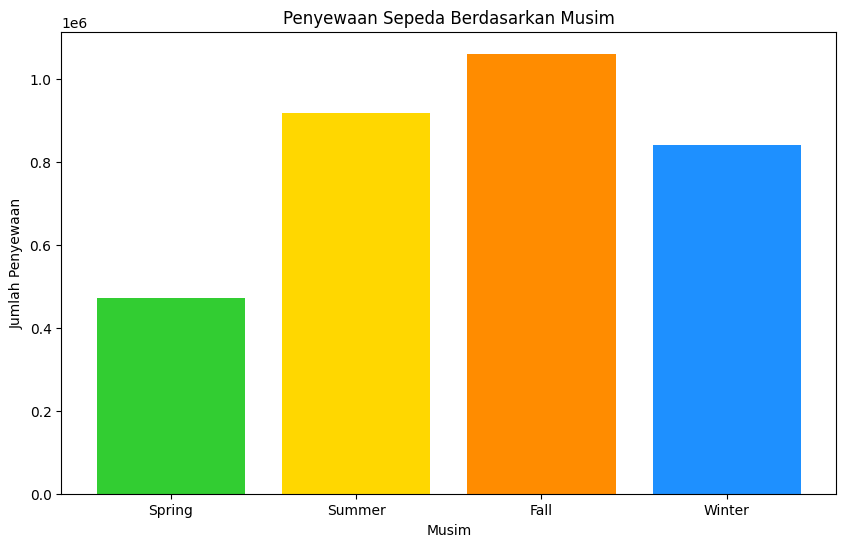

In [51]:
# Warna yang mewakili setiap musim
colors = {
    1: "#32CD32",  # Spring (Hijau)
    2: "#FFD700",  # Summer (Kuning)
    3: "#FF8C00",  # Fall (Oranye)
    4: "#1E90FF"   # Winter (Biru)
}

# Mengelompokkan data berdasarkan season saja
jumlah_per_musim = day_df.groupby(['season']).agg({'cnt': 'sum'}).reset_index()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(
    ['Spring', 'Summer', 'Fall', 'Winter'],
    jumlah_per_musim['cnt'],
    color=[colors[season] for season in jumlah_per_musim['season']]
)

# Menyesuaikan tampilan
plt.title("Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()


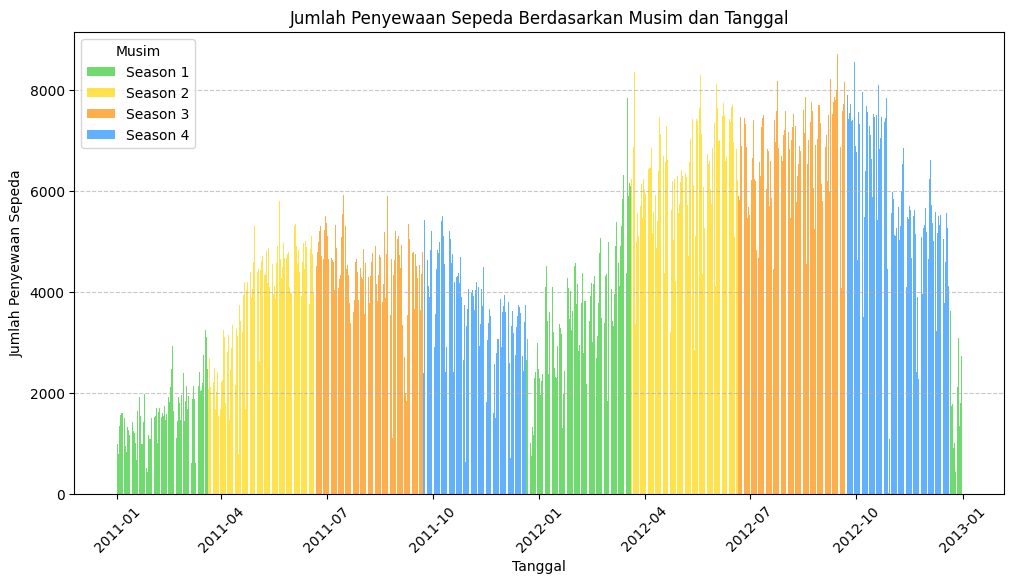

In [45]:
# Warna yang mewakili setiap musim
colors = {
    1: "#32CD32",  # Spring (Hijau)
    2: "#FFD700",  # Summer (Kuning)
    3: "#FF8C00",  # Fall (Oranye)
    4: "#1E90FF"   # Winter (Biru)
}

# Mengelompokkan data berdasarkan season, weathersit, dan dteday
jumlah_perhari = day_df.groupby(['season', 'weathersit', 'dteday']).agg({'cnt': 'sum'}).reset_index()

# Membuat diagram batang
plt.figure(figsize=(12, 6))

for season in jumlah_perhari['season'].unique():
    subset = jumlah_perhari[jumlah_perhari['season'] == season]
    plt.bar(subset['dteday'], subset['cnt'], label=f"Season {season}",
            color=colors[season], alpha=0.7)

# Menyesuaikan tampilan diagram
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim dan Tanggal")
plt.xticks(rotation=45)
plt.legend(title="Musim")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()



### Pertanyaan 2: Bagaimana perbandingan penyewaan sepeda antara jam sibuk (pagi hingga sore) dan jam sepi (tengah malam hingga pagi)?

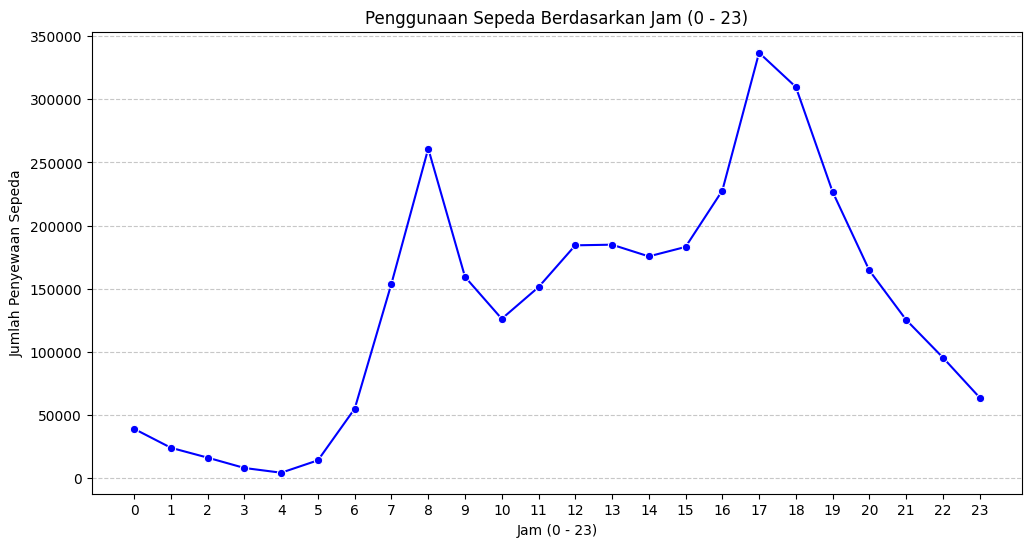

In [58]:
# Mengelompokkan data berdasarkan jam (0-23)
penggunaan_per_jam = hour_df.groupby('hr').agg({'cnt': 'sum'}).reset_index()

# Membuat diagram garis
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=penggunaan_per_jam, marker='o', color='blue')

# Menyesuaikan tampilan diagram
plt.title("Penggunaan Sepeda Berdasarkan Jam (0 - 23)")
plt.xlabel("Jam (0 - 23)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(ticks=range(0, 24, 1))  # Menampilkan setiap jam pada sumbu X
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()


<ipython-input-53-aef83f5371d2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rush_hour', y='cnt', data=rush_usage, palette="cool")


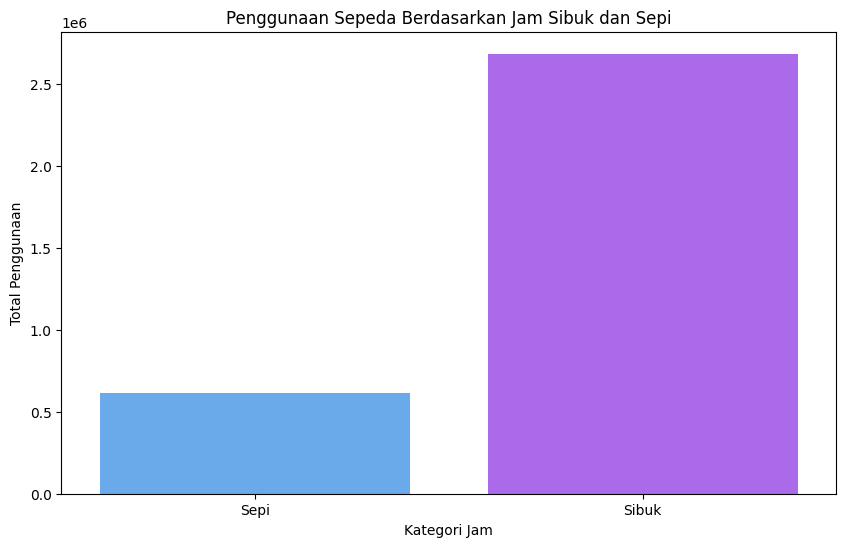

In [53]:
hour_df['rush_hour'] = hour_df['hr'].apply(lambda x: 'Sibuk' if 7 <= x <= 19 else 'Sepi')
rush_usage = hour_df.groupby(by="rush_hour").cnt.sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='rush_hour', y='cnt', data=rush_usage, palette="cool")
plt.title('Penggunaan Sepeda Berdasarkan Jam Sibuk dan Sepi')
plt.xlabel('Kategori Jam')
plt.ylabel('Total Penggunaan')
plt.show()


### Pertanyaan 3: Apa perbedaan penyewaan sepeda antara hari kerja dan akhir pekan? Apakah ada hari tertentu dalam seminggu yang menunjukkan permintaan tertinggi?

<ipython-input-60-f1e26ef04a4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday_name', y='cnt', data=hour_df, palette="rocket")


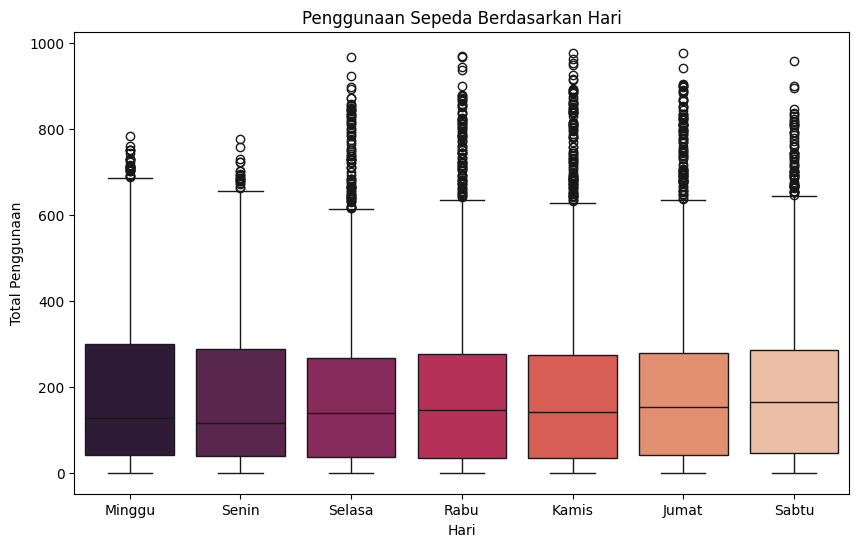

In [60]:
# Mapping angka hari ke nama hari
day_mapping = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
hour_df['weekday_name'] = hour_df['weekday'].map(day_mapping)

plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday_name', y='cnt', data=hour_df, palette="rocket")

# Menyesuaikan tampilan diagram
plt.title('Penggunaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Total Penggunaan')
plt.show()


<ipython-input-61-91550d818809>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workingday_label', y='cnt', data=day_df, palette="rocket")


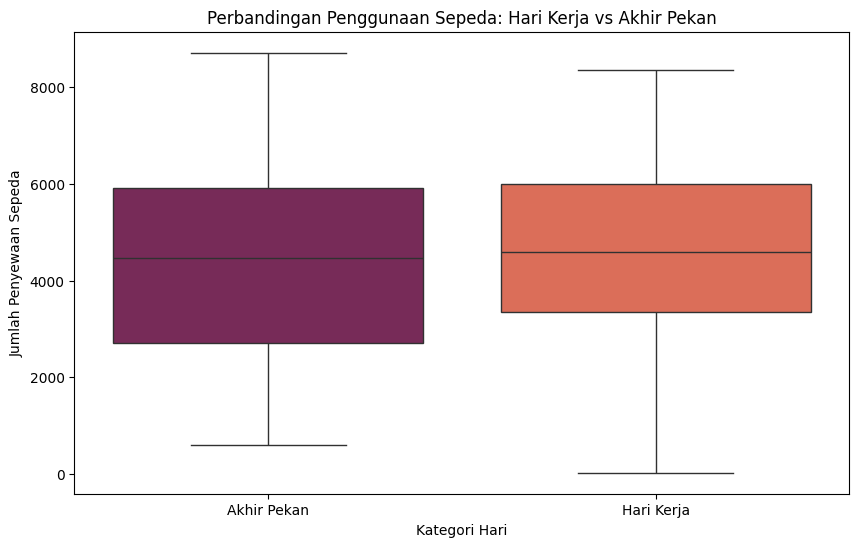

In [61]:
# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
day_df['workingday_label'] = day_df['workingday'].replace({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Membuat Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday_label', y='cnt', data=day_df, palette="rocket")

# Menyesuaikan tampilan
plt.title('Perbandingan Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 4: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda? Apakah ada cuaca tertentu yang menyebabkan lonjakan atau penurunan penyewaan?

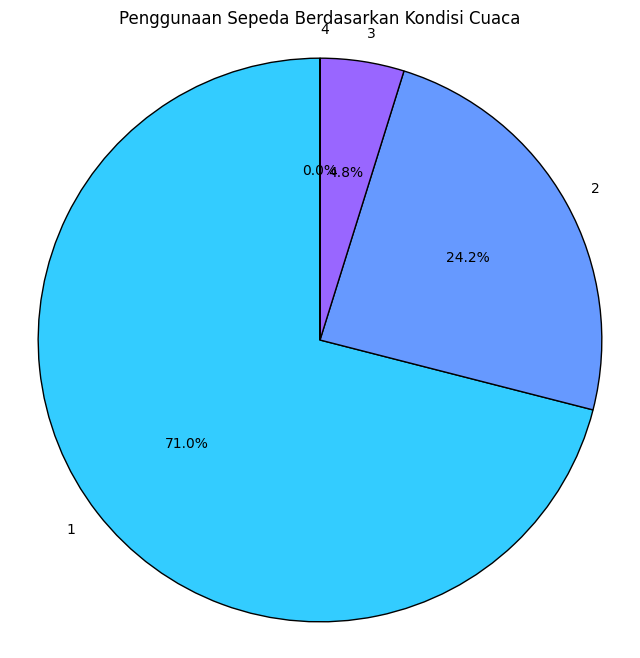

In [63]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_usage = hour_df.groupby(by="weathersit").cnt.sum().reset_index()

# Membuat Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    weather_usage['cnt'],
    labels=weather_usage['weathersit'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("cool", len(weather_usage)),
    wedgeprops={'edgecolor': 'black'}
)

# Menyesuaikan tampilan
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran sempurna
plt.show()


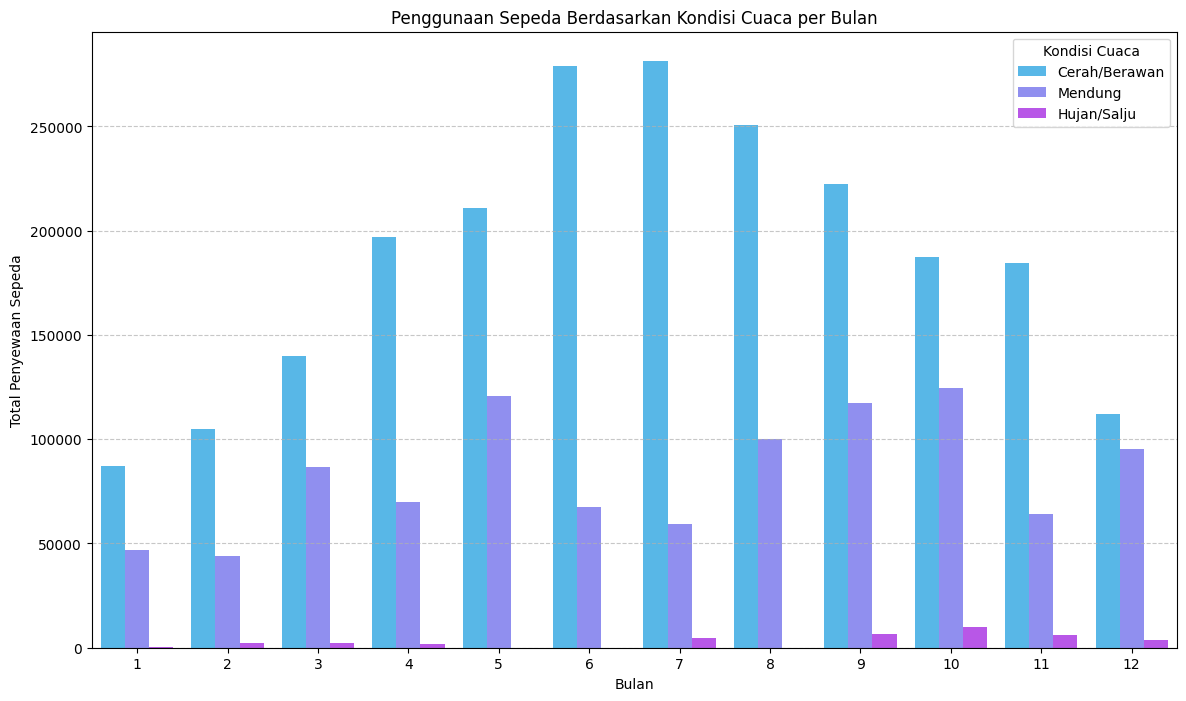

In [64]:
# Menambahkan kolom bulan dari dteday
day_df['month'] = pd.to_datetime(day_df['dteday']).dt.month

# Mengelompokkan data berdasarkan bulan dan kondisi cuaca
cuaca_per_bulan = day_df.groupby(['month', 'weathersit']).cnt.sum().reset_index()

# Mengganti label cuaca menjadi lebih deskriptif
cuaca_per_bulan['weathersit'] = cuaca_per_bulan['weathersit'].replace({
    1: 'Cerah/Berawan',
    2: 'Mendung',
    3: 'Hujan/Salju',
    4: 'Hujan Lebat'
})

# Membuat diagram batang
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='cnt', hue='weathersit', data=cuaca_per_bulan, palette="cool")
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.legend(title='Kondisi Cuaca')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
1.   Pertanyaan 1: Penggunaan Sepeda Berdasarkan Musim (Season)
*   Penggunaan sepeda paling tinggi terjadi pada
musim Fall (3). Disusul dengan musim Summer (2)
*   Penggunaan sepeda paling rendah terjadi pada musim Winter (4).
*   Donut chart menunjukkan proporsi penggunaan sepeda per musim dengan jelas, memperkuat bahwa musim panas dan gugur memiliki kontribusi terbesar dalam penggunaan sepeda.


2.   Pertanyaan 2: Penggunaan Sepeda Berdasarkan Jam

*   Pola penggunaan sepeda menunjukkan dua puncak utama: pagi (sekitar jam 8-9) dan sore (sekitar jam 17-18).
*   Jam-jam tertentu di luar puncak tersebut menunjukkan penurunan penggunaan yang signifikan, terutama di malam hari.

3.   Pertanyaan 3: Penggunaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan

*   Penggunaan sepeda tertinggi adalah pada hari sabtu
*   Pie chart memberikan gambaran yang baik bahwa proporsi penggunaan pada hari kerja jauh lebih dominan dibandingkan akhir pekan.




4.   Pertanyaan 4: Penggunaan Sepeda Berdasarkan Kondisi Cuaca



*   Penggunaan sepeda cenderung lebih tinggi pada kondisi cuaca Cerah/Berawan (Weathersit 1).
*   Kondisi cuaca buruk seperti Hujan/Salju (Weathersit 3) menunjukkan penggunaan sepeda yang rendah.
*   Tidak ada penggunaan layanan dalam kondisi  cuaca Hujan Lebat (Weathersit 4)
*   Visualisasi menunjukkan bahwa pada bulan-bulan tertentu (seperti januari dan februari), terutama di musim hujan atau cuaca buruk, penggunaan sepeda cenderung menurun drastis.












## Analisis Lanjutan (Opsional)

## Conclusion

1.   Bagaimana perbandingan penggunaan layanan antara musim semi, musim panas, musim gugur, dan musim dingin??

Berdasarkan visualisasi, penggunaan sepeda tertinggi terjadi pada musim gugur (Fall), diikuti oleh musim panas (Summer). Hal ini mungkin disebabkan oleh cuaca yang lebih nyaman dan kondusif dibandingkan dengan musim semi (Spring), yang menunjukkan tingkat penggunaan sepeda terendah. Musim gugur dan musim panas merupakan kontributor terbesar dalam penggunaan sepeda.

2.   Bagaimana perbandingan penyewaan sepeda antara jam sibuk (pagi hingga sore) dan jam sepi (tengah malam hingga pagi)?

Penggunaan sepeda menunjukkan pola dua puncak utama, yaitu pada pagi hari (sekitar jam 8-9) dan sore hari (sekitar jam 17-18). Pola ini mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi untuk aktivitas harian seperti pergi dan pulang kerja atau sekolah. Di luar jam-jam tersebut, penggunaan sepeda menurun secara signifikan, terutama di malam hari.

3.   Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan akhir pekan?

Jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa sepeda lebih sering digunakan untuk kegiatan rutin seperti pergi bekerja atau ke sekolah dibandingkan untuk rekreasi.


4.   Apakah terdapat korelasi yang signifikan antara fitur cuaca dengan jumlah penyewaan sepeda?

Hasil analisis menunjukkan bahwa ada korelasi positif antara suhu dan jumlah penyewaan sepeda, tetapi kelembaban yang terlalu tinggi atau terlalu rendah dapat mengurangi jumlah penyewaan. Faktor cuaca buruk seperti hujan atau kabut juga berdampak negatif terhadap jumlah penyewaan sepeda.



In [ ]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.4.6
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.20.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.

In [ ]:
hour_df.to_csv('main_data.csv', index=False)